In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [3]:
import warnings
warnings.simplefilter(action='ignore')

In [4]:
#READ CSV TRAIN DATA
train_df=pd.read_csv("C:\\Users\\91888\\OneDrive\\Desktop\\KAGGLE\\train.csv")

In [5]:
#READ CSV TEST DATA
test_df=pd.read_csv("C:\\Users\\91888\\OneDrive\\Desktop\\KAGGLE\\test.csv")


In [6]:
#preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("the number of samples into the train data is {}".format(train_df.shape[0]))

the number of samples into the train data is 891


In [8]:
#Preview test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print("the number of samples into the test data is {}".format(test_df.shape[0]))

the number of samples into the test data is 418


# 2.Data Quality & Missing Value Assessment

In [10]:
#checking for missing values in train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.1 Age-Missing Values

In [11]:
#percent of missing "AGE"
print('Percent of missing "AGE" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "AGE" records is 19.87%


~20% of entries for passengers age are missing.Lets see what the 'AGE' variables looks like in general

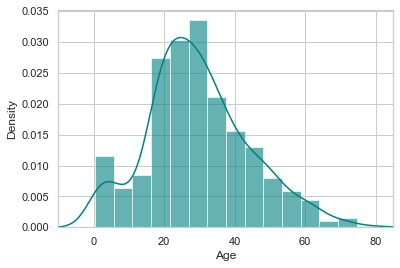

In [12]:
ax=train_df['Age'].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df["Age"].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

since age is right skewed,using the mean might give us biased results by filling in ages that are older than desired.To deal with this, we will use the median to impute the missing values

In [13]:
print('the mean of "Age" is %.2f'%(train_df["Age"].mean(skipna=True)))
print('the median of "Age" is %.2f'%(train_df["Age"].median(skipna=True)))

the mean of "Age" is 29.70
the median of "Age" is 28.00


# 2.2 Cabin-Missing Values

In [14]:
print('Percent of missing "Cabin"records is %.2f%%'%((train_df['Cabin'].isnull().sum()/train_df.shape[0]*100)))

Percent of missing "Cabin"records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise.we will ignore this variable in our model.

# 2.3 Embarked-Missing Values

In [15]:
print('percent of missing "Embarked" records is %.2f%%' % (train_df['Embarked'].isnull().sum()/train_df.shape[0]*100))

percent of missing "Embarked" records is 0.22%


there are only 2(0.22%) missing values for"Embarked",so we can just impute with the port where most people boarded.

Boarded Passengers grouped by port of embarked(C=Cherboourg,Q=Queenstown,S=Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


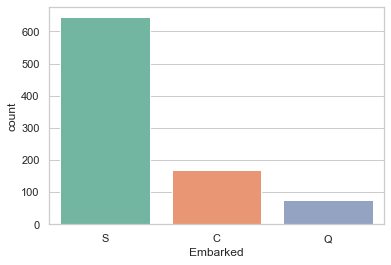

In [16]:
print('Boarded Passengers grouped by port of embarked(C=Cherboourg,Q=Queenstown,S=Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train_df,palette='Set2')
plt.show()

In [17]:
print('The most common boarding port of embarkation is %s.'%train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


by far the most passengers boarded in Southhampton,so we will impute those 2 NaN's W/"s".

# 2.4. Final Adjustment to Data(Train & Test)

Based on my assessment of the missing values in the dataset ,i will make the following changes to the data :

-->> if "Age" is missing for a given row, i will impute with 28(median age).
-->> if "Embarked" is missing for a given row,i will impute with "S" (the most common boarding port).
-->> i will ignore "Cabin" as a variable.There are too many missing values for imputation.Based on the information available,it appearesa that this value is associated with the passengers class and fare paid.

In [18]:
train_data=train_df.copy()
train_data["Age"].fillna(train_df['Age'].median(skipna=True),inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [19]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


ValueError: denisty is not a valid plot kind

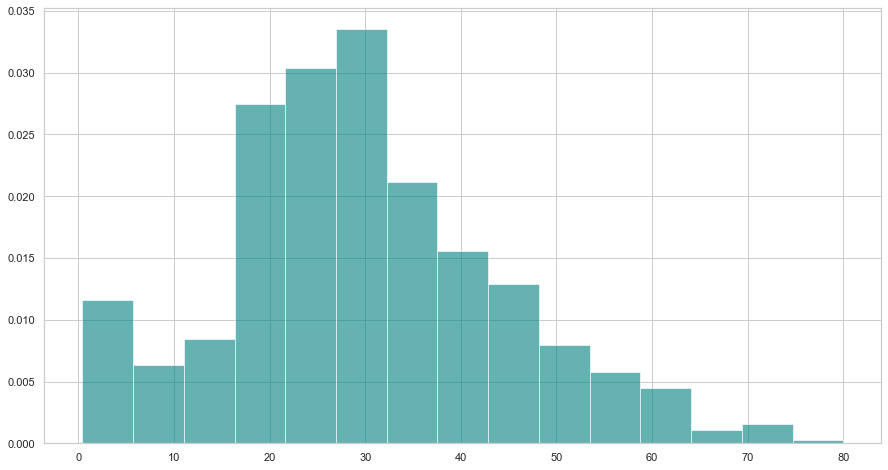

In [21]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='denisty', color='teal')
ax=train_data["Age"].hist(bins=15, density=True, stacked=True, Color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

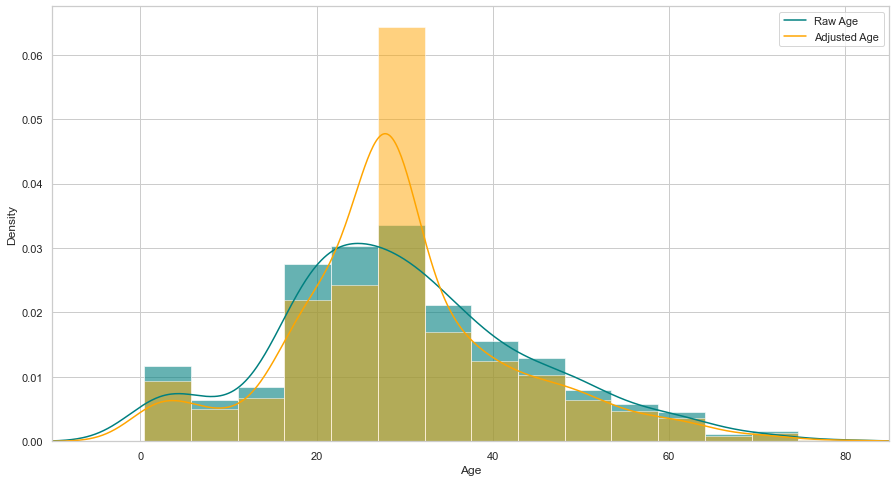

In [23]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# 2.4.1. Additional Variables

According to the kaggle data dicitionary,both SibSp and Parch relate to traveling with family.For simplicity sake(and to account for possible multicollinearity),i will combine the effect of these variables into one categorical predicator.whether or not that individual was travelling alone.

In [30]:
## Create Categorical variable for travelling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop("SibSp",axis=1,inplace=True)
train_data.drop("Parch",axis=1,inplace=True)

KeyError: 'SibSp'

In [29]:
train_data['TravelAlone']=np.where((train_data['SibSp']+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

KeyError: 'SibSp'

In [31]:
#creating categorical variables and drop some variables
training=pd.get_dummies(train_data,columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId',axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train=training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


# Now,apply to same imputation for "Age" in the test data .
as i did for my training data(if missing,Age=28).
i will also remove the "Cabin" variable from the test data,i have decided not to includeit in my analysis.
There were no missing values in the "Embarked" port variable.
i will add the dummy variables to finalize the test set.
Finally,i will impute the 1 missing value for "Fare" with the median,14.45.

In [26]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
test_data=test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True),inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data["TravelAlone"]=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

testing=pd.get_dummies(test_data,columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female',axis=1,inplace=True)
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

final_test=testing
final_test.head()


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# 3.Exploratory Data Analysis

3.1. Exploration of Age

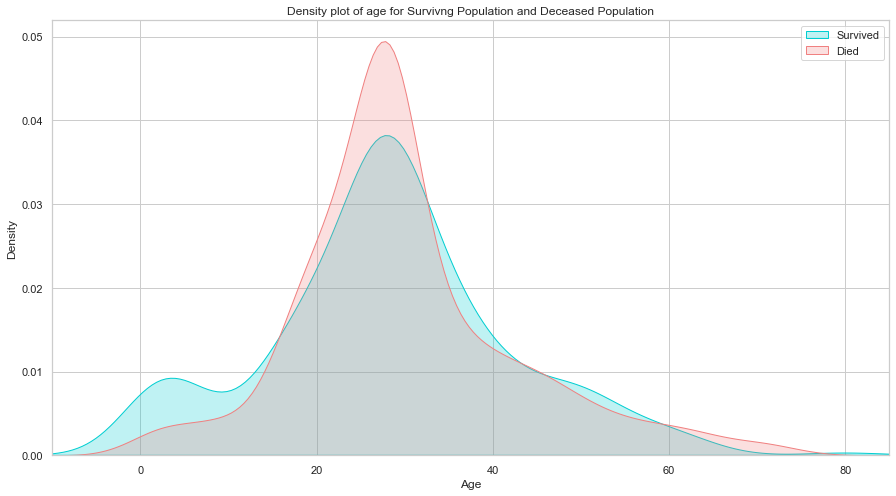

In [32]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived==0],color="lightcoral",shade=True)
plt.legend(['Survived','Died'])
plt.title("Density plot of age for Survivng Population and Deceased Population")
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and decreased is actually very similar. One notable difference is that,of the surviours,a larger propotion were children.The passengers evidently made an attempt to save children by giving them a place on the life rafts

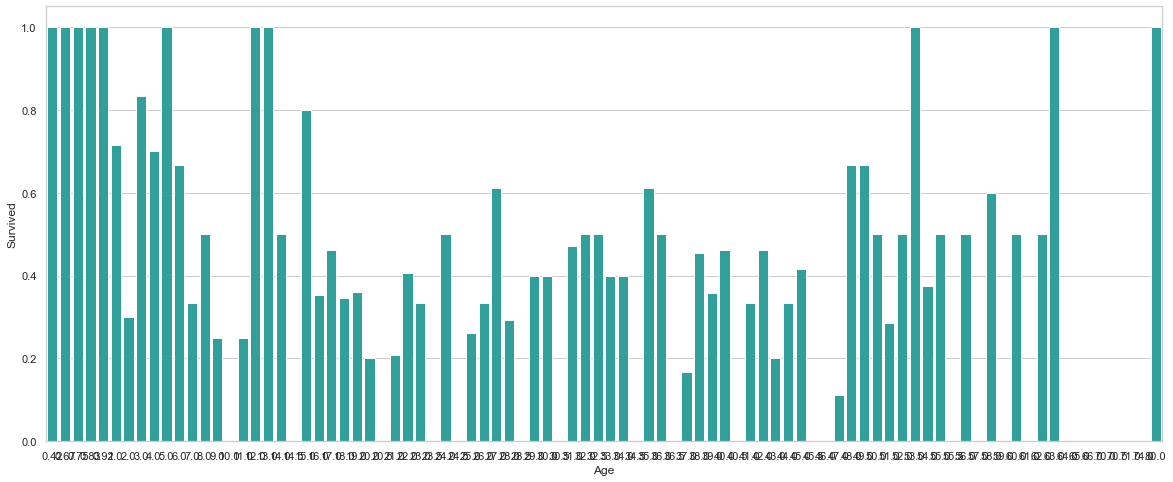

In [33]:
plt.figure(figsize=(20,8))
avg_survival_byage=final_train[["Age","Survived"]].groupby(["Age"],as_index=False).mean()
g=sns.barplot(x="Age",y="Survived",data=avg_survival_byage,color="LightSeaGreen")
plt.show()

Considering the survival rate of passengesrs under 16,i will also include another categorical variable in my dataset:"Minor"

In [34]:
final_train['IsMinor']=np.where(final_train["Age"]<=16,1,0)

final_test["IsMinor"]=np.where(final_test["Age"]<=16,1,0)

# 3.2. Exploration of Fare

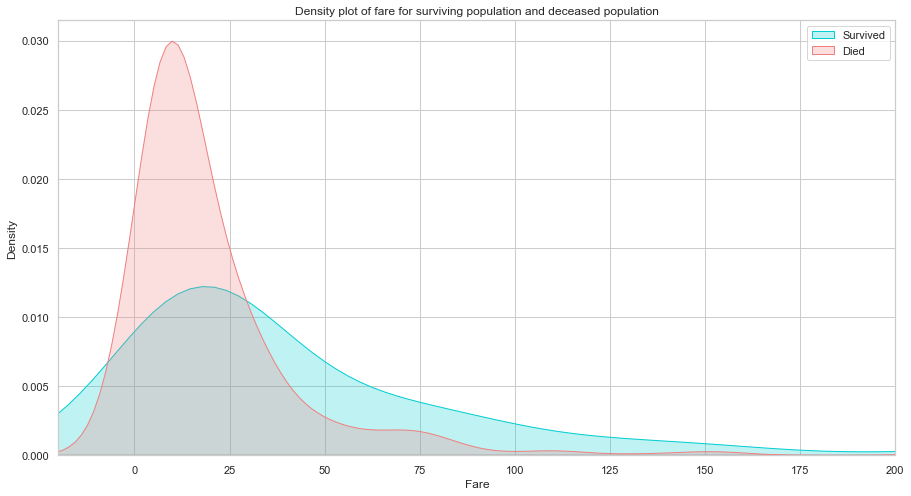

In [35]:
plt.figure(figsize=(15,8))
ax=sns.kdeplot(final_train["Fare"][final_train.Survived==1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived==0],color="lightcoral",shade=True)
plt.legend(["Survived",'Died'])
plt.title("Density plot of fare for surviving population and deceased population")
ax.set(xlabel="Fare")
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the farres of survivors vs deceased,its likely that this would be a significant predicator in our final model.Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with passenger class,which we look at next.

# 3.3 Exploration of Passengers class

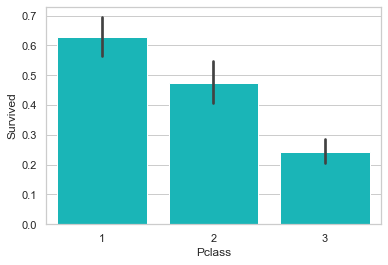

In [36]:
sns.barplot("Pclass","Survived",data=train_df,color="darkturquoise")
plt.show()

Unsurprisingly, being a first class passenger was safest

# 3.4. Exploration of Embarked Port

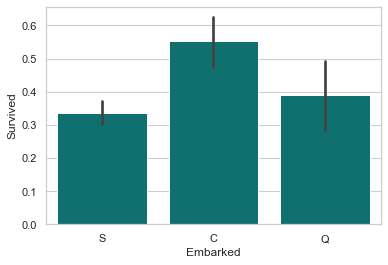

In [37]:
sns.barplot("Embarked","Survived",data=train_df,color="teal")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

# 3.5. Exploration of Travel Alone vs With family 

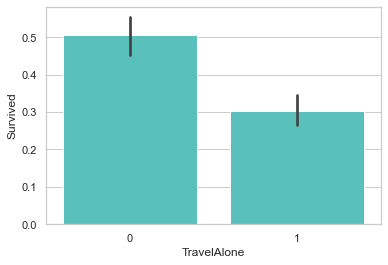

In [38]:
sns.barplot("TravelAlone","Survived",data=final_train,color="mediumturquoise")
plt.show()

individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

# 3.6. Exploration of Gender Variable

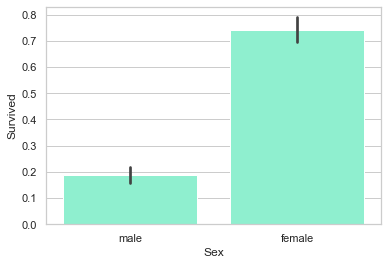

In [39]:
sns.barplot('Sex',"Survived",data=train_df,color="aquamarine")
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

# 4. Logistic Regression and Results

# 4.1 Feature Selection

# 4.1.1. Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [41]:
cols=["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]

X=final_train[cols]
y=final_train['Survived']

model=LogisticRegression()

rfe=RFE(model, 8)
rfe=rfe.fit(X,y)

print('Selected features : %s' %list(X.columns[rfe.support_]))

Selected features : ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


# 4.1.2. Feature ranking with recursive feature elimination and cross-validation


RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation

Optimal number of features : 9
selected features : ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


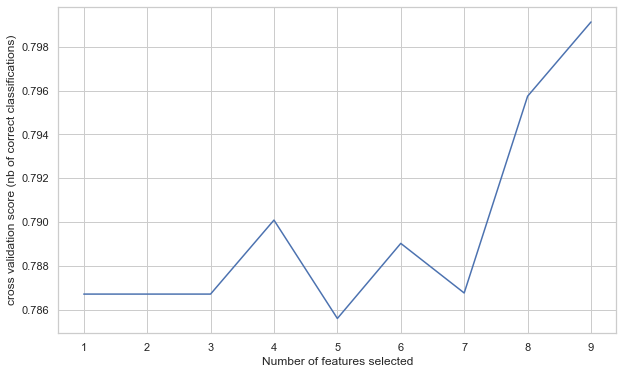

In [42]:
from sklearn.feature_selection import RFECV

rfecv=RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X,y)

print("Optimal number of features : %d" % rfecv.n_features_)
print("selected features : %s" %list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))

plt.xlabel("Number of features selected")
plt.ylabel("cross validation score (nb of correct classifications)")

plt.plot(range(1, len(rfecv.grid_scores_)+ 1),rfecv.grid_scores_)
plt.show()

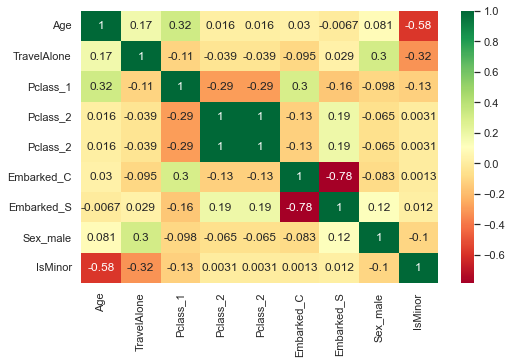

In [43]:
Selected_features=['Age','TravelAlone','Pclass_1','Pclass_2','Pclass_2',"Embarked_C","Embarked_S","Sex_male","IsMinor"]

X=final_train[Selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")

plt.show() 

4.2. Review of model evaluation procedures

Motivation: Need a way to choose between machine learning models

Goal is to estimate likely performance of a model on out-of-sample data
Initial idea: Train and test on the same data

But, maximizing training accuracy rewards overly complex models which overfit the training data
Alternative idea: Train/test split

Split the dataset into two pieces, so that the model can be trained and tested on different data
Testing accuracy is a better estimate than training accuracy of out-of-sample performance
Problem with train/test split
It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
Testing accuracy can change a lot depending on a which observation happen to be in the testing set

4.2.1. Model evaluation based on simple train/test split 

Train/Test split results :
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.505
LogisticRegression auc is 0.838


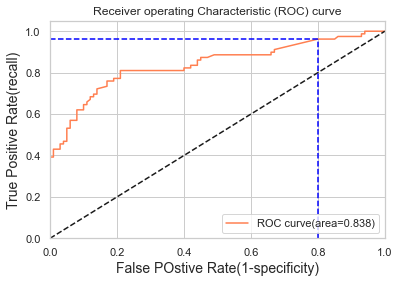

Using a threshold of 0.069 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [44]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

X=final_train[Selected_features]
y=final_train['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
[fpr, tpr,thr] = roc_curve(y_test,y_pred_proba)

print("Train/Test split results :")
print(logreg.__class__.__name__+" accuracy is %2.3f" %accuracy_score(y_test,y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" %log_loss(y_test,y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx=np.min(np.where(tpr>0.95))

plt.figure()

plt.plot(fpr,tpr,color='coral',label="ROC curve(area=%0.3f)" %auc(fpr,tpr))
plt.plot([0,1],[0,1],"k--")
plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]],'k--',color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]],"k--",color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False POstive Rate(1-specificity)',fontsize=14)
plt.ylabel('True Positive Rate(recall)',fontsize=14)

plt.title('Receiver operating Characteristic (ROC) curve')
plt.legend(loc='lower right')

plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function

In [5]:
logreg=LogisticRegression()

scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('k_fold cross-validation results :')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" log_loss is %2.3f" % scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


NameError: name 'LogisticRegression' is not defined

In [48]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.800
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


4.2.3. Model evaluation based on K-flod cross-validation using cross_validate() function

In [3]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy':'accuracy','log_loss':'neg_log_loss','auc':'roc_auc'}

modelCV = LogisticRegression()
results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

print('k-flod cross-validation results :')

for sc in range(len(scoring)):
    print(modelCV.__class__.name__+"average %s: %.3f (+/-%.3f)" % (liSt(scoring.keys())[sc],-results['test_%s' % list(scoring.values())[sc]].mean()
                                                                   if list(scoring.values())[sc]=='neg_log_loss'
                                                                   else results['test_%s' % list(scoring.values())[sc]].mean()
                                                                   results['test_%s' % list(scoring.values())[sc]].std()
    

SyntaxError: invalid syntax (Temp/ipykernel_15068/2513625311.py, line 13)

In [4]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

NameError: name 'LogisticRegression' is not defined